In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, silhouette_score,r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler




In [2]:
df = pd.read_csv('/content/Books_Data_Clean.csv')


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
df.head()



First 5 rows of the dataset:


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
# Dataset information
print("\nDataset Information:")
print(df.info())



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), i

In [5]:
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Missing Values in Each Column:
index                   0
Publishing Year         1
Book Name              23
Author                  0
language_code          53
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64


#Data Cleaning and Handling Missing Values
Handling Missing Values

In [6]:
# Fill missing 'Publishing Year' with the mode
df['Publishing Year'].fillna(df['Publishing Year'].mode()[0], inplace=True)

# Drop rows with missing 'Book Name'
df = df.dropna(subset=['Book Name'])

# Fill missing 'language_code' with 'Unknown'
df['language_code'].fillna('Unknown', inplace=True)

# Standardize 'genre' entries (e.g., replace 'fiction' with 'genre fiction')
df['genre'] = df['genre'].replace({'fiction': 'genre fiction'})


<ipython-input-6-7f2936f5822a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publishing Year'].fillna(df['Publishing Year'].mode()[0], inplace=True)
<ipython-input-6-7f2936f5822a>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value,

In [7]:

#Check  missing values remain
print("\nMissing Values after Cleaning:")
print(df.isnull().sum())



Missing Values after Cleaning:
index                  0
Publishing Year        0
Book Name              0
Author                 0
language_code          0
Author_Rating          0
Book_average_rating    0
Book_ratings_count     0
genre                  0
gross sales            0
publisher revenue      0
sale price             0
sales rank             0
Publisher              0
units sold             0
dtype: int64


In [8]:
# Descriptive statistics for numerical columns
print(df.describe())

             index  Publishing Year  Book_average_rating  Book_ratings_count  \
count  1047.000000      1047.000000           1047.00000         1047.000000   
mean    533.494747      1971.115568              4.00255        94987.737345   
std     308.421094       186.735278              0.24679        31449.738538   
min       0.000000      -560.000000              2.97000        27308.000000   
25%     267.500000      1984.500000              3.85000        70414.000000   
50%     534.000000      2002.000000              4.01000        89410.000000   
75%     796.500000      2009.000000              4.17000       113946.000000   
max    1069.000000      2016.000000              4.77000       206792.000000   

        gross sales  publisher revenue   sale price   sales rank    units sold  
count   1047.000000        1047.000000  1047.000000  1047.000000   1047.000000  
mean    1847.212875         833.911381     4.841490   610.357211   9799.228271  
std     3940.055642        2255.5902

In [9]:
# Descriptive statistics for categorical columns
print(df.describe(include=['object']))

            Book Name        Author language_code Author_Rating  \
count            1047          1047          1047          1047   
unique           1045           722             9             4   
top     The Awakening  Stephen King           eng  Intermediate   
freq                2            29           725           618   

                genre                      Publisher   
count            1047                            1047  
unique              3                               9  
top     genre fiction  Amazon Digital Services,  Inc.  
freq              864                             591  


Distribution of Publishing Years

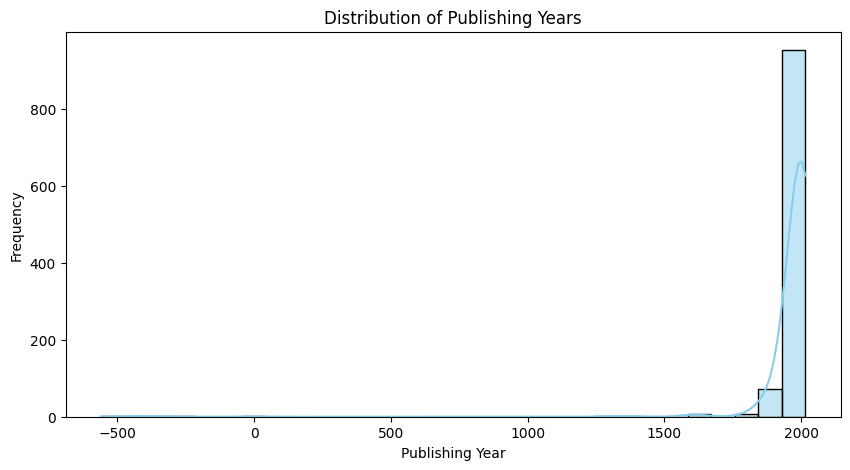

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(df['Publishing Year'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Publishing Years')
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.show()

Distribution of Book Average Ratings

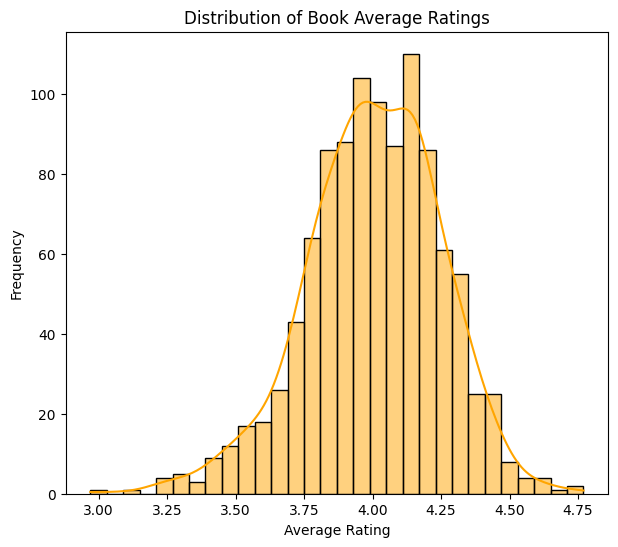

In [11]:
plt.figure(figsize=(7,6))
sns.histplot(df['Book_average_rating'], bins=30, kde=True, color='orange')
plt.title('Distribution of Book Average Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Frequency')
plt.show()


Relationship Between Book Ratings and Gross Sales

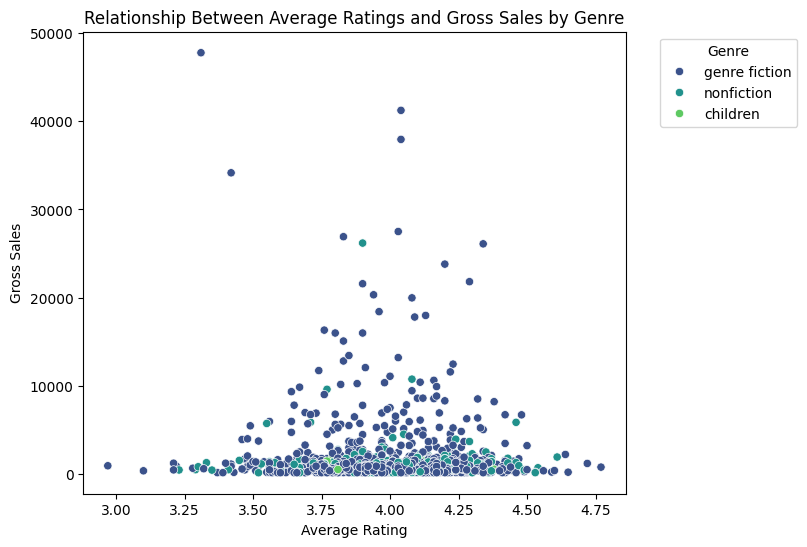

In [12]:
plt.figure(figsize=(7,6))
sns.scatterplot(x='Book_average_rating', y='gross sales', data=df, hue='genre', palette='viridis')
plt.title('Relationship Between Average Ratings and Gross Sales by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Gross Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Gross Sales Distribution by Genre

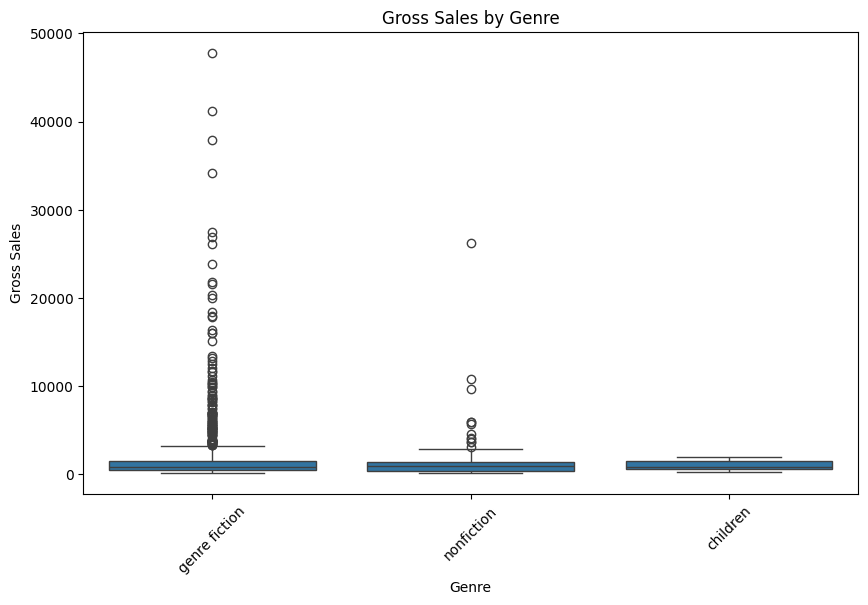

In [13]:
plt.figure(figsize=(10,6))
sns.boxplot(x='genre', y='gross sales', data=df)
plt.title('Gross Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Gross Sales')
plt.xticks(rotation=45)
plt.show()


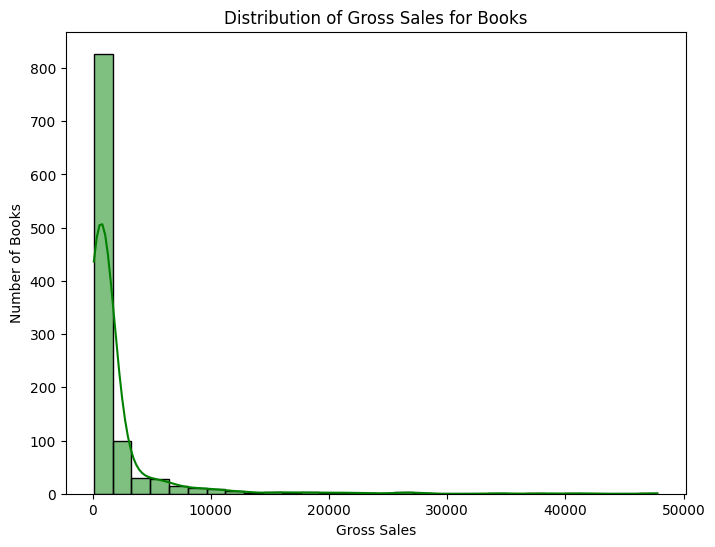

In [14]:
plt.figure(figsize=(8,6))
sns.histplot(df['gross sales'], bins=30, kde=True, color='green')
plt.title('Distribution of Gross Sales for Books')
plt.xlabel('Gross Sales')
plt.ylabel('Number of Books')
plt.show()


#Encoding Categorical Variables

In [15]:
# List of categorical columns to encode
categorical_columns = ['Publisher ', 'language_code', 'genre', 'Author_Rating']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Display the DataFrame after encoding
print("\nData after Label Encoding:")
df.head()



Data after Label Encoding:


,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",4,3,3.42,155903,1,34160.0,20496.0,4.88,1,3,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",5,2,4.23,145267,1,12437.5,7462.5,1.99,2,3,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,5,3,3.31,138669,1,47795.0,28677.0,8.69,3,0,5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,4,2,4.04,150898,1,41250.0,24750.0,7.50,3,1,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,5,2,4.04,198283,1,37952.5,22771.5,7.99,4,6,4750


#Modeling

#Linear Regression

In [16]:

# Selecting features and target variable
X_lr = df[['Publishing Year', 'Book_average_rating', 'Book_ratings_count', 'sale price', 'Author_Rating', 'sales rank']]
y_lr = df['gross sales']

# Splitting the data into training and testing sets
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

# Scaling the features
scaler_lr = StandardScaler()
X_train_lr_scaled = scaler_lr.fit_transform(X_train_lr)
X_test_lr_scaled = scaler_lr.transform(X_test_lr)


In [17]:
# train the model
lr = LinearRegression()
lr.fit(X_train_lr_scaled, y_train_lr)


LinearRegression()

Visualising the Training set results

<ipython-input-18-d44170a224f7>:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_train_lr.min(), y_train_lr.max()], [y_train_lr.min(), y_train_lr.max()], 'k--', lw=2, color='red')


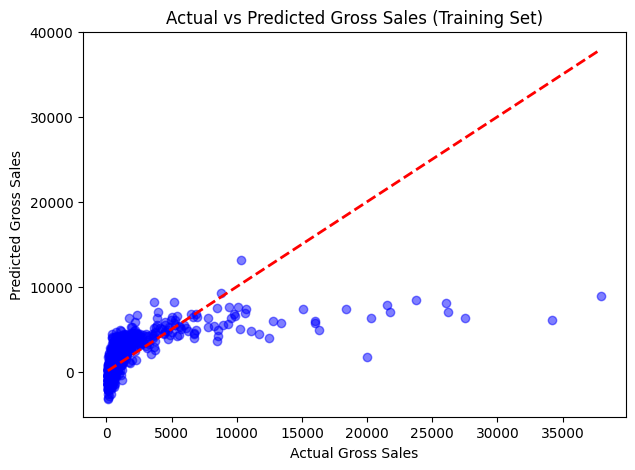

In [18]:
#  predictions on the training set
y_train_pred = lr.predict(X_train_lr_scaled)


plt.figure(figsize=(7,5))
plt.scatter(y_train_lr, y_train_pred, color='blue', alpha=0.5)
plt.plot([y_train_lr.min(), y_train_lr.max()], [y_train_lr.min(), y_train_lr.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Gross Sales')
plt.ylabel('Predicted Gross Sales')
plt.title('Actual vs Predicted Gross Sales (Training Set)')
plt.show()


Visualising the Test set results

<ipython-input-19-dabb0c33b5c0>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'k--', lw=2, color='red')


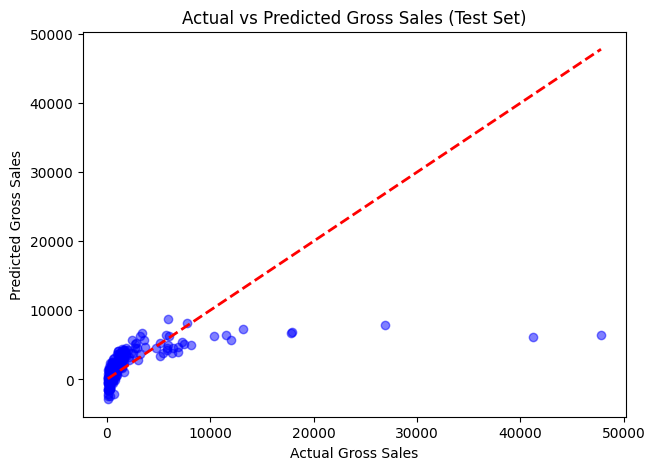

In [19]:
# predictions on the test set
y_test_pred = lr.predict(X_test_lr_scaled)

plt.figure(figsize=(7, 5))
plt.scatter(y_test_lr, y_test_pred, color='blue', alpha=0.5)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual Gross Sales')
plt.ylabel('Predicted Gross Sales')
plt.title('Actual vs Predicted Gross Sales (Test Set)')
plt.show()


#Isolation Forest for Anomaly Detection

In [20]:
# Selecting features for anomaly detection
X_iso = df[['gross sales', 'publisher revenue', 'units sold', 'Book_average_rating', 'sale price', 'Book_ratings_count']]

# Splitting the data into training and testing sets
X_train_iso, X_test_iso = train_test_split(X_iso, test_size=0.2, random_state=42)

# Scaling the features
scaler_iso = StandardScaler()
X_train_iso_scaled = scaler_iso.fit_transform(X_train_iso)
X_test_iso_scaled = scaler_iso.transform(X_test_iso)


In [21]:
# train the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(X_train_iso_scaled)

IsolationForest(contamination=0.01, random_state=42)

In [22]:

# Predict anomalies
anomalies = iso_forest.predict(X_test_iso_scaled)


Visualize anomalies(Isolation Forest)

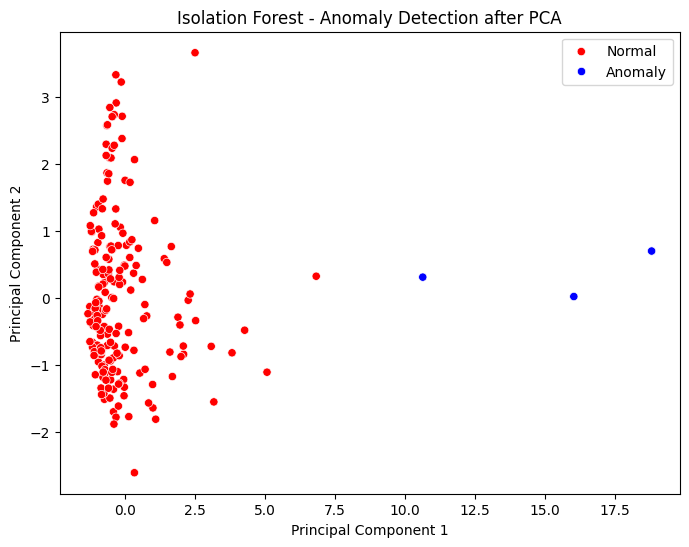

In [23]:
from sklearn.decomposition import PCA

pca_iso = PCA(n_components=2)
X_pca_iso = pca_iso.fit_transform(X_test_iso_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca_iso[:,0], y=X_pca_iso[:,1], hue=anomalies, palette=['blue', 'red'])
plt.title('Isolation Forest - Anomaly Detection after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(['Normal', 'Anomaly'])
plt.show()


#K-Means Clustering

In [24]:
# Selecting features for clustering
X_cluster = df[['Book_average_rating', 'Book_ratings_count', 'Publishing Year', 'genre', 'Author_Rating', 'sale price', 'units sold']]

# Scaling the features
scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)


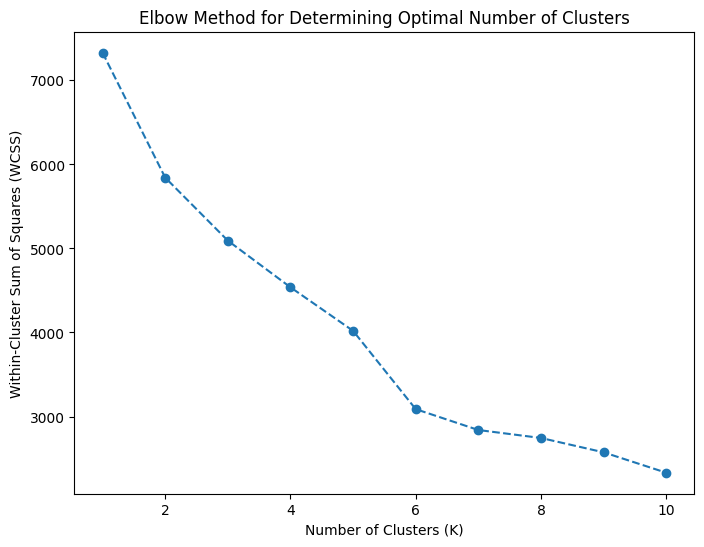

In [25]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_cluster_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()


In [26]:

kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_cluster_scaled)


Visualising the clusters

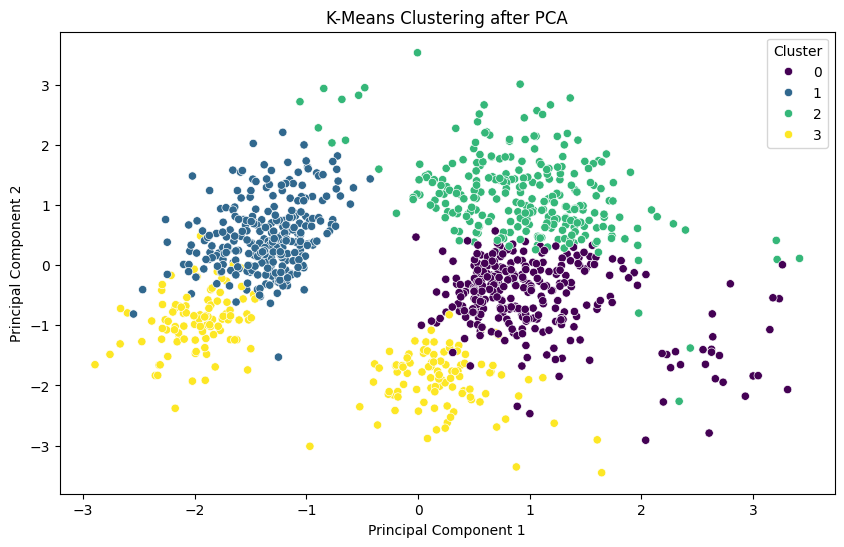

In [27]:
# Add cluster labels to the original DataFrame
df_cluster = df.copy()
df_cluster['Cluster'] = clusters


pca_cluster = PCA(n_components=2)
X_pca_cluster = pca_cluster.fit_transform(X_cluster_scaled)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca_cluster[:,0], y=X_pca_cluster[:,1], hue=clusters, palette='viridis')
plt.title('K-Means Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
